In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt

/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Chosen baseline features
features = ['precipitation_amt_mm', 
            'reanalysis_avg_temp_k', 
            'station_diur_temp_rng_c',
            'reanalysis_relative_humidity_percent', 
            'reanalysis_tdtr_k']

In [3]:
data = pd.read_csv('./dengue_features_train.csv', index_col=[0,1,2,3])
labels = pd.read_csv('./dengue_labels_train.csv', index_col=[0,1,2])

In [4]:
sj_features = data.loc['sj']
iq_features = data.loc['iq']
sj_labels = labels.loc['sj']
iq_labels = labels.loc['iq']

sj_features.fillna(method='ffill', inplace=True)
iq_features.fillna(method='ffill', inplace=True)

In [5]:
#interpolate features to prevent bias
sj_features = sj_features.interpolate()
iq_features = iq_features.interpolate()

sj_features = sj_features[features].values
iq_features = iq_features[features].values

In [6]:
sj_labels = sj_labels.values
iq_labels = iq_labels.values

In [7]:
#read in test features
test_features = pd.read_csv('./dengue_features_test.csv', index_col=[0,1,2,3])
test_features.fillna(method='ffill', inplace=True)
sj_test = test_features.loc['sj']
iq_test = test_features.loc['iq']

sj_test = sj_test.interpolate()
iq_test = iq_test.interpolate()

sj_test = sj_test[features].values
iq_test = iq_test[features].values

In [8]:
#XGBoost Regressor on SJ data, using all features
sj_model = XGBRegressor()
sj_model.fit(sj_features, sj_labels)
sj_train_pred = sj_model.predict(sj_features)
sj_train_pred = sj_train_pred.astype(int)
sj_score = mean_absolute_error(sj_train_pred, sj_labels)
sj_score


20.616452991452991

In [9]:
#Predict on test features
sj_pred = sj_model.predict(sj_test)
sj_pred = sj_pred.astype(int)
sj_pred

array([ 25,  10,  34,  18,  36,  33,  60,  35,  31,  38,  29,  29,  33,
        36,  91,  37,  29,  47,  44,  76,  41,  29,  33,  30,  30,  12,
        41,  26,  17,  28,  17,  17,  26,  21,  14,  14,   8,  30,   8,
        32,  10,  22,   8,  10,  25,  12,  19,   7,   9,   7,  10,  15,
        19,   4,  20,  19,   9,  24,  25,  28,  33,  30,  40,  22,  29,
        42,  32,  37,  35,  25,  34,  36,  29,  36,  43,  52,  44,  27,
        33,  34,  35,  35,  30,  31,  30,  27,  18,  18,  21,  23,  45,
         9,  24,  19,  23,  23,  33,  11,  10,  28,  32,  11,  12,  17,
        15,  20,  33,  26,  38,  89,  54,  41,  36, 138,  32,  45,  85,
        31,  93,  35,  47,  46,  30,  86,  48,  33,  43,  32, 100,  37,
        54,  24,  23,  11,  23,  23,  14,  25,   6,   8,  53,  23,  21,
        34,  12,  13,  13,  21,  15,   6,  15,  11,  20,  48,  15,  20,
         7,  13,   9,  28,  53,  31,  30,  57, 124,  64,  50,  98,  41,
        98,  39,  86,  35,  86,  29,  44,  48,  36,  34,  48,  4

In [10]:
#XGBoost Regressor on IQ data, using all features
iq_model = XGBRegressor()
iq_model.fit(iq_features, iq_labels)
iq_train_pred = iq_model.predict(iq_features)
iq_train_pred = iq_train_pred.astype(int)
iq_score = mean_absolute_error(iq_train_pred, iq_labels)
iq_score

4.2846153846153845

In [11]:
#Predict on test features
iq_pred = iq_model.predict(iq_test)
iq_pred = iq_pred.astype(int)
iq_pred

array([ 5,  4,  5,  5,  4,  5,  4,  7,  2,  4,  6,  9,  8,  4,  6,  4, 11,
        6,  5,  5,  5, 16,  5, 12,  8,  5,  5, 12, 11,  4,  5,  8,  7, 12,
        8, 12,  8,  8, 11,  8,  8,  6,  8,  7,  9, 12,  7,  3,  5,  4,  3,
        2,  5,  1,  2,  7,  2,  5,  6,  3,  4,  7,  4,  6,  5,  4,  6,  9,
       12,  3, 15,  4,  9, 11, 14,  8, 11,  3, 15,  7,  5,  4, 19,  8, 17,
        5,  6,  2,  4,  1,  0,  6,  9,  7,  6, 12,  5,  4,  3,  1,  6,  8,
        1,  4,  6,  0,  2,  6,  0,  1,  5,  3,  4,  2,  3,  4,  3,  6,  2,
        8, 14,  8,  8,  8, 10,  6,  9, 10, 11, 13, 11,  2,  6,  9,  9, 10,
        7,  8,  8,  6, 11,  9, 10, 11,  5, 12,  5,  2, 10, 10,  9,  6,  6,
        0,  4,  6])

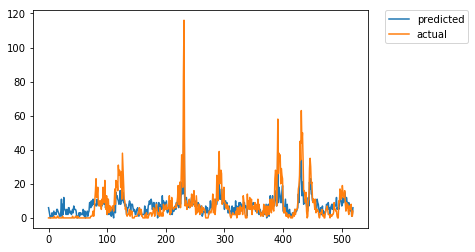

In [12]:
#IQ predicted vs actual
plt.plot(iq_train_pred, label = 'predicted')
plt.plot(iq_labels, label = 'actual')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

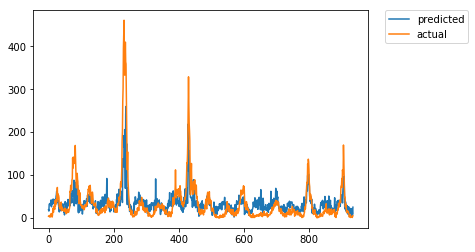

In [13]:
#SJ predicted vs actual
plt.plot(sj_train_pred, label='predicted')
plt.plot(sj_labels, label='actual')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [14]:
submission = pd.read_csv("./submission_format.csv", index_col=[0, 1, 2])

sj_pred = np.asarray(sj_pred)
iq_pred = np.asarray(iq_pred)
final_pred = np.concatenate((sj_pred, iq_pred), axis = 0)

In [15]:
submission.total_cases = final_pred

In [16]:
submission.to_csv("./benchmark.csv")